In [34]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from ACF import ACF

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
final_df = pd.read_csv('dataset_featured_v2.csv')

In [36]:
X = final_df.drop('Target', axis=1)
Y = final_df.Target

In [37]:
PII_columns = ['Marital_status','Gender','Nacionality']

In [56]:
model = ACF(X, Y, PII_columns)

In [58]:
model.fit()

In [59]:
choice = "Marital_status"

acf_metrics, logistic_reg_fair_metrics = model.score(choice, 0, 1)

In [60]:
labels, log_reg_model = zip(*logistic_reg_fair_metrics)
headers, acf_model = zip(*acf_metrics)
ACF={'Metrics':headers[0:6], 
             'Baseline Model':list(log_reg_model[2:8]), 'ACF Fair Model':list(acf_model[0:6])}
ACF_table=pd.DataFrame.from_dict(ACF)
ACF_table

,Metrics,Baseline Model,ACF Fair Model
0,Equal Opps,0.043176,0.018766
1,PredEq,0.054457,0.012842
2,Equal Odds,0.097632,0.031608
3,PredParity,0.012306,0.025653
4,DemoParity,0.142602,0.076355
5,AOD,0.048816,0.015804


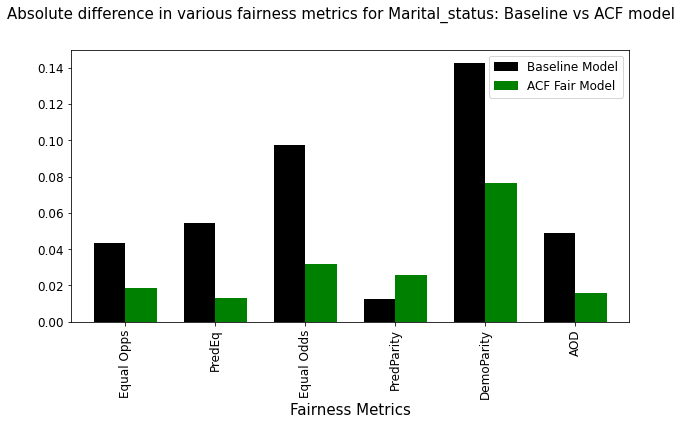

In [61]:
ax = ACF_table.plot.bar(x='Metrics', rot=90, width = 0.7, color=['black', 'green'], figsize=(10,5), fontsize=12)
plt.suptitle('Absolute difference in various fairness metrics for {}: Baseline vs ACF model'.format(choice),  
             fontsize=15, y=1)

patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right', fontsize=12)

ax.set_xlabel('Fairness Metrics', fontsize=15)
plt.show()

# CUF

In [53]:
model.flip_sensitive()

In [54]:
model.cuf()

In [55]:
acf_metrics, logistic_reg_fair_metrics = model.score_cuf(choice, 0, 1)

ValueError: y should be a 1d array, got an array of shape (1290, 2) instead.

In [46]:
labels, log_reg_model = zip(*logistic_reg_fair_metrics)
headers, cuf_model = zip(*acf_metrics)
CUF={'Metrics':headers[0:6], 
             'Baseline Model':list(log_reg_model[2:8]), 'ACF Fair Model':list(cuf_model[0:6])}
CUF_table=pd.DataFrame.from_dict(CUF)
CUF_table

,Metrics,Baseline Model,ACF Fair Model
0,Equal Opps,0.103730,0.103730
1,PredEq,0.039355,0.039355
2,Equal Odds,0.064375,0.064375
3,PredParity,0.085407,0.085407
4,DemoParity,0.005100,0.005100
5,AOD,0.032187,0.032187


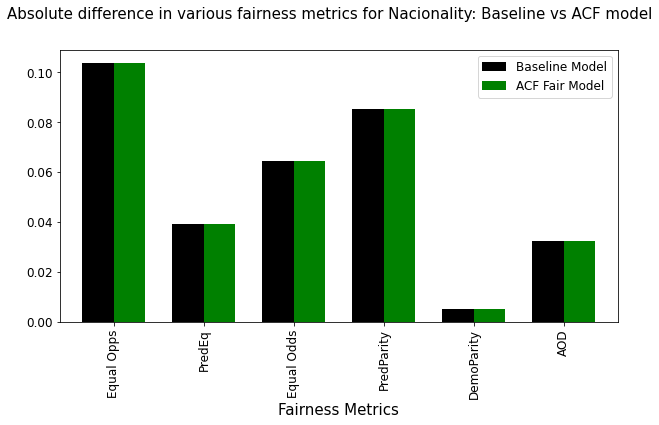

In [47]:
ax = CUF_table.plot.bar(x='Metrics', rot=90, width = 0.7, color=['black', 'green'], figsize=(10,5), fontsize=12)
plt.suptitle('Absolute difference in various fairness metrics for {}: Baseline vs ACF model'.format(choice),  
             fontsize=15, y=1)

patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right', fontsize=12)

ax.set_xlabel('Fairness Metrics', fontsize=15)
plt.show()